In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),
                                       (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.inodes, -0.5), 
                                       (self.onodes, self.hnodes))
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot(
                                        (output_errors * final_outputs * (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot(
                                        (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [3]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.1
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
training_data_file = open("./mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [6]:
test_data_file = open("./mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

9


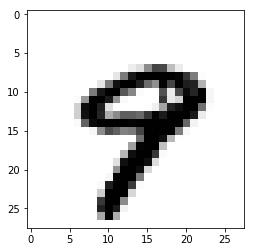

In [7]:
all_values2 = test_data_list[-1].split(',')
print(all_values2[0])
image_array = numpy.asfarray(all_values2[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [8]:
n.query((numpy.asfarray(all_values2[1:]) / 255.0 * 0.99) * 0.01)

array([[0.17104135],
       [0.19585813],
       [0.0991822 ],
       [0.14691782],
       [0.16025948],
       [0.09280389],
       [0.17449327],
       [0.17696986],
       [0.14230776],
       [0.12404755]])

In [12]:
scorecard = []
for record in test_data_list:
    all_values3 = record.split(',')
    correct_label = int(all_values3[0])
    print(correct_label, "correct label")
    inputs = (numpy.asfarray(all_values3[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7 correct label
0 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
0 network's answer
1 correct label
1 network's answer
4 correct label
7 network's answer
9 correct label
0 network's answer
5 correct label
0 network's answer
9 correct label
7 network's answer


In [10]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.3


In [11]:
scorecard

[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]